# **Task 1: Prediction using Supervised ML**

**GRIP @ The Sparks Foundation**

### **Author:** Shravana Sabhapandit
### Data Science & Business Analytics Intern
**October 2022**

# **PREDICTION USING SUPERVISED ML**

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

**Importing DataSet**

In [3]:
df=pd.read_csv('student_scores.csv')
print('First Five Rows....')
df.head(5)

First Five Rows....


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**EDA TO GAIN INSIGHTSFROM THE DATA**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Positive Linear Regression**

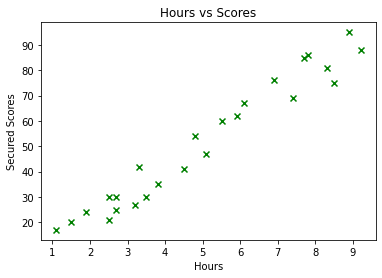

In [6]:
Hours=df['Hours']
Score=df['Scores']
plt.scatter(Hours,Score,color='green',marker='x')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Secured Scores')
plt.show()


**Determine the training and testing datasets...**

In [7]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

**Model Selection and Training**

In [8]:
model=linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
model.coef_[0],model.intercept_

(9.910656480642237, 2.018160041434683)

**Linear Regression Line**

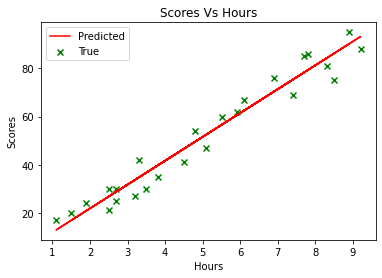

In [10]:
line=model.coef_[0]*x + model.intercept_
plt.scatter(x,y,marker='x',color='green',label='True')
plt.plot(x,line,color='red',label='Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores Vs Hours')
plt.legend()
plt.show()

**Determine R Square Score**

In [11]:
y_prediction=model.predict(x_test)

print('R2 score :{:^.4f}'.format(r2_score(y_test,y_prediction)))
print('RMSE :{:^.4f}'.format(mean_squared_error(y_test,y_prediction,squared=False)))
print('MAE :{:^.4f}'.format(mean_absolute_error(y_test,y_prediction)))

R2 score :0.9455
RMSE :4.6474
MAE :4.1839


**Dataframe about Actual and Prediction**

In [12]:
df2=pd.DataFrame({'Actual':y_test,'Prediction':y_prediction})
df2

,Actual,Prediction
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Predict The Score If a Student Studies 9.25hours/Day**

In [13]:
hours=9.25
print('No Of Hours::',hours)
print('Predicted Score::',model.predict([[hours]])[0])

No Of Hours:: 9.25
Predicted Score:: 93.69173248737538


Answer:-If a student studies 9.25 hours/day then his/her predicted score is 93.69..

****